In [38]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from lxml import etree
from IPython.display import Image
%matplotlib inline

In [2]:
classes = os.listdir('../data/raw/images/images')
print(classes)

['crease', 'crescent_gap', 'inclusion', 'oil_spot', 'punching_hole', 'rolled_pit', 'silk_spot', 'waist folding', 'water_spot', 'welding_line']


In [37]:
Image(url= "https://storage.googleapis.com/kaggle-datasets-images/729820/1267148/5900f6392769c25da1794909f0596447/dataset-card.jpg")

In [3]:
#Количество фото
image_path = glob.glob('../data/raw/images/images/*/*.jpg')
print(len(image_path))
print(image_path[0])

2306
../data/raw/images/images\crease\img_01_3436789500_00004.jpg


In [4]:
#Количество разметки
xmls_path = glob.glob('../data/raw/label/label/*.xml')
print(len(xmls_path))
print(xmls_path[0])

2280
../data/raw/label/label\img_01_3402617700_00001.xml


In [5]:
#Распределение по классам
class_distr= {}
for val in classes:
    class_distr[val] = len(glob.glob(f'../data/raw/images/images/{val}/*.jpg'))

In [6]:
print(class_distr)

{'crease': 52, 'crescent_gap': 226, 'inclusion': 216, 'oil_spot': 204, 'punching_hole': 219, 'rolled_pit': 31, 'silk_spot': 650, 'waist folding': 146, 'water_spot': 289, 'welding_line': 273}


In [7]:
class_table = pd.DataFrame.from_dict(data=class_distr, orient='index', columns = ['Amount'])
class_table.loc['Total'] = class_table.sum(axis=0)

In [8]:
class_table

,Amount
crease,52
crescent_gap,226
inclusion,216
oil_spot,204
punching_hole,219
rolled_pit,31
silk_spot,650
waist folding,146
water_spot,289
welding_line,273


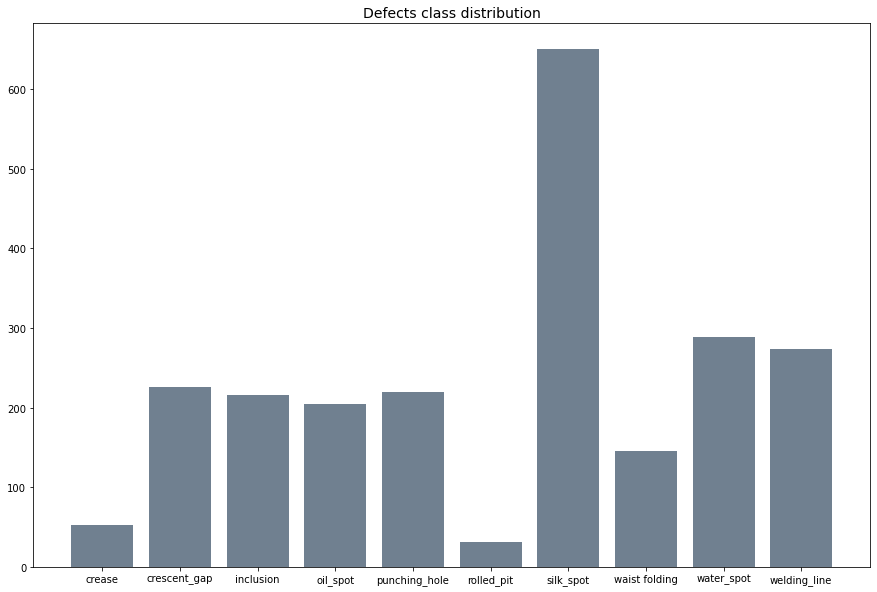

In [9]:
values = list(class_distr.values())
labels = list(class_distr.keys())

plt.figure(figsize=(15,10))
plt.bar( labels, values, color='slategray')
plt.title('Defects class distribution', fontdict={'fontsize':14})
plt.show()

In [22]:
xmls_path.sort(key = lambda x:x.split("\\")[-1].split(".xml")[0])
image_path.sort(key = lambda x:x.split("\\")[-1].split(".jpg")[0])

In [23]:
xmls_train = [path.split("\\")[-1].split(".")[0] for path in xmls_path]
xmls_train[:5]

['img_01_3402617700_00001',
 'img_01_3402617700_01009',
 'img_01_3436789500_00004',
 'img_01_3436814600_00259',
 'img_01_3436815300_00473']

In [24]:
images_train = [img for img in image_path if (img.split("\\")[-1].split)(".jpg")[0] in xmls_train]
images_train[:5]

['../data/raw/images/images\\crescent_gap\\img_01_3402617700_00001.jpg',
 '../data/raw/images/images\\crescent_gap\\img_01_3402617700_01009.jpg',
 '../data/raw/images/images\\crease\\img_01_3436789500_00004.jpg',
 '../data/raw/images/images\\silk_spot\\img_01_3436814600_00259.jpg',
 '../data/raw/images/images\\silk_spot\\img_01_3436815300_00473.jpg']

In [25]:
len(images_train)

2280

In [26]:
def image_size(path):
    
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    
    # Извлечение характеристик изображения
    width = int(sel.xpath("//size/width/text()")[0])
    height = int(sel.xpath("//size/height/text()")[0])
    
    return [width, height]

In [27]:
image_sizes = [image_size(path) for path in xmls_path]

In [44]:
image_sizes = np.array(image_sizes)
print(f'Средний размер картинки:{image_sizes.mean(axis=0)}, Среднее отклонение:{image_sizes.std(axis=0)}')

Средний размер картинки:[2048. 1000.], Среднее отклонение:[0. 0.]


In [20]:
def to_labels(path):
    
    xml = open("{}".format(path)).read()                         
    sel = etree.HTML(xml)
    
    # Извлечение характеристик изображения
    width = int(sel.xpath("//size/width/text()")[0])
    height = int(sel.xpath("//size/height/text()")[0]) 
    
    # Извлечение параметров bounding box
    xmin = int(sel.xpath("//bndbox/xmin/text()")[0])
    xmax = int(sel.xpath("//bndbox/xmax/text()")[0])
    ymin = int(sel.xpath("//bndbox/ymin/text()")[0])
    ymax = int(sel.xpath("//bndbox/ymax/text()")[0])
    
    # Относительные координаты
    return [xmin/width, ymin/height, xmax/width, ymax/height]

In [ ]:
def load_image(path):
    